In [40]:
from bigraph_viz import plot_bigraph, plot_flow, plot_multitimestep, pf
from bigraph_viz.dict_utils import replace_regex_recursive

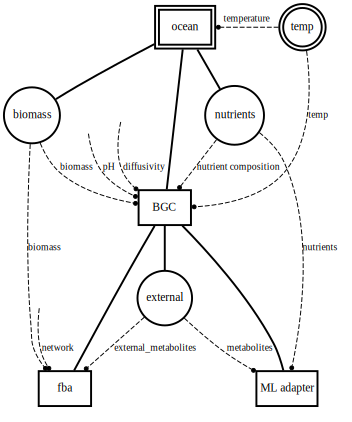

In [37]:
ms_ocean_model = {
    'ocean': {
        '_ports': {
            'temperature': ''
        },
        'wires': {
            'temperature': 'temp'
        },
        'biomass': 'Any',
        'BGC': {
            '_ports': {
                'biomass': '',
                'temp': '',
                'pH': '',
                'diffusivity': '',
                'nutrient composition': 'pd.Dataframe',
            },
            'wires': {
                'temp': ['..', 'temp'],
                'biomass': 'biomass',
                'nutrient composition': 'nutrients',
            },
            'fba': {
                # '_address': 'URI',
                '_ports': {
                    'network': '',
                    'external_metabolites': 'np.array',
                    'biomass': '',
                },
                'wires': {
                    'biomass': ['..', 'biomass'],
                    'external_metabolites': 'external',
                }
            },
            'ML adapter': {
                '_ports': {
                    'nutrients': 'pd.Dataframe',
                    'metabolites': 'np.array',
                },
                'wires': {
                    'nutrients': ['..', 'nutrients'],
                    'metabolites': 'external',
                }
            }, 
            'external': 'Any',
        },
        'nutrients': 'Any',
    },
    'temp': 'Any',
}

node_groups = [
    [('ocean',), ('temp',)],
]
plot_bigraph(ms_ocean_model, node_groups=node_groups)

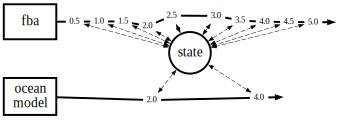

In [50]:
multitimestep_spec = {
    'ocean model': {
        '_ports': {'port1': 'Any'},
        'wires': {'port1': 'state'},
        '_sync_step': 2.0,
    },
    'fba': {
        '_ports': {'port1': 'Any'},
        'wires': {'port1': 'state'},
        '_sync_step': 0.5,
    },
}
multitimestep_spec = replace_regex_recursive(multitimestep_spec)
plot_multitimestep(multitimestep_spec, total_time=5.0)

In [ ]:
from vivarium.core import Engine

In [ ]:
sim = Engine(ms_ocean_model)
sim.run(100)